In [1]:
# Imports
import torch
import numpy as np
import torchvision.transforms as transforms
from model_loaders_convolutional import loadmodel_convolutional_response_optimized
import numpy as np
import torch
import sys
sys.path.append('/home/mk2299/NSD/clean_attention/NetDissect-Lite/dissect/')
from netdissect import imgviz
from netdissect import show
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
model = loadmodel_convolutional_response_optimized(roi_type = 'face', roi = 4, thr = None)
net = model[0].cuda().eval()
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


Test correlation: 0.3361647251069392
torch.Size([1, 3053, 1, 1])


In [3]:
def predict(net, img, percent_level, unit_number = 1300):
    #img = Image.open(requests.get(url, stream=True).raw)
    inputs = preprocess(img)
    acts = net(inputs.unsqueeze(0).cuda())
    level_rq = torch.tensor(np.load('dissection/rq/rq_quantiles_face_4_%.03f.npy' % percent_level))
    iv = imgviz.ImageVisualizer((224, 224), #source=dataset, quantiles=rq,
        level=level_rq)
    show([[iv.masked_image(inputs, acts, (0, unit_number))]])
    seg_img = iv.masked_image(inputs, acts, (0, unit_number))
    return 

In [4]:
concept_ix = 1716 # face in the Network dissection library 
iou = np.load('dissection/iou/%s_iou.npy' % 'face')
print(iou.shape)
top_neurons = np.argsort(iou[1716])[::-1][:50]

(1813, 3053)



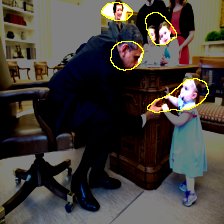

In [5]:
predict(model[0], img=Image.open('static/test.jpeg'), percent_level=0.99, unit_number = np.random.choice(top_neurons))